In [23]:
import pylab

# Just using it as it was provided in the question
def do_plot(x_vals,y_vals,year):
    '''Plot x_vals vs. y_vals where each is a list of numbers of the same length.'''
    pylab.xlabel('Income')
    pylab.ylabel('Cumulative Percent')
    pylab.title("Cumulative Percent for Income in "+str(year))
    pylab.plot(x_vals,y_vals)
    pylab.show()
    
    
# define a function to open a file
def open_file():
    '''Return file pointer and its year'''
    while True:
        year = input("Enter a year where 1990 <= year <= 2015: ")
        if year.isdigit()==True:
            fname = 'year' + year + '.txt'

            if 2015 >= int(year) >= 1990 :  
                try:
                    fp = open(fname,'r')
                    return fp,int(year)
                except:
                    print('Error in year. Please try again.')
            else:
                print("Error in year. Please try again")
        else:
            print('Error in year. Please try again..')

# read the file
def read_file(fp):
    '''Return content of text file as a list of list'''
    mydata = fp.readlines()
    list_of_data=[]
    for line in mydata[2:-1]: # exclude first two (it is header) and the last (will handle separately) row.
        line = line.split()
        line.pop(1)
        # remove ',' from individual values
        line = [int(j.replace(',','')) if '.' not in j else float(j.replace(',','')) for j in line]
        list_of_data.append(line)
    
    # handle the last row
    RowLast = mydata[-1]
    RowLast = RowLast.split()
    RowLast.pop(1)
    for i in range(len(RowLast)):

        RowLast[i] = RowLast[i].replace(',','')

        if '.' in RowLast[i]:
            RowLast[i] = float(RowLast[i])
        elif RowLast[i].isdigit()==False:
            RowLast[i] = float('Inf') # replace the 'over' word with infinity
        else:
            RowLast[i] = int(RowLast[i])
    list_of_data.append(RowLast)
    return list_of_data
        
def find_average(data_list):
    '''return average salary from data_list'''
    totalSalary = sum(column[5] for column in data_list) # total salary
    num_of_person = data_list[-1][3] # get the number of person from last row
    avg_sal = float(totalSalary / num_of_person)
    return avg_sal
    
def find_median(data_list):
    '''
    return median from the given data_list
    '''
    for column in data_list:
        if column[4] <50: 
            bottom = column
        else:
            top = column
            break
    if abs(bottom[4] - 50) < abs(top[4] - 50):
        return bottom[6]
    else:
        return top[6]
        
def get_range(data_list, percent):
    '''
    Based on given arguments return salary range, cumulative percentage and average income
    '''
    for column in data_list:
        if column[4] >= percent: 
            return (column[0], column[1]), column[4], column[6]

def get_percent(data_list, income):
    '''
     return salary range and cumulative percentage form given arguments
    '''
    for column in data_list:
        # income greater than float(col[0]) and income less than float(col[1])
        if float(column[1]) >= income >= float(column[0]):
            return (column[0], column[1]), column[4]

def main():
    file_pointer,year = open_file()
    mydata = read_file(file_pointer)
    mean = find_average(mydata)
    median = find_median(mydata)
    print("\n{:<6} {:<14} {:<14}".format('year','mean','median'))
    print("{:<6d}${:<14,.2f}${:<14,.2f}".format(year,mean,median))
    
    while True:
        response = input("Do you want to plot values (yes/no)? ")
        if response.lower() == 'yes':
            # determine x_vals, a list of floats -- use the lowest 40 income ranges
            x_vals = [column[0] for column in mydata][:40] # get x values

            # determine y_vales, a list of floats of the same length as x_vals
            y_vals = [column[4] for column in mydata][:40] # get y values

            # call the plotting function
            do_plot(x_vals, y_vals, year)
            break
        elif response.lower() == 'no':
            break
        else:
            print('Wrong input,please try again.')
        
    choice = input("Enter a choice to get (r)ange, (p)ercent, or nothing to stop: ")
    
    while choice:
        if choice == 'r':
            percent = input('Enter a percentage: ')
            try:
                if float(percent)>=0 and float(percent) <=100:
                    myrange = get_range(mydata, float(percent))[0][0]
                    print("{:4.2f}% of incomes are below ${:<13,.2f}.".format(float(percent),myrange))
                else:
                    print('Error in percent. Please try again')
            except:
                print('Error in percent. Please try again')
        elif choice == 'p':
            income = input('Enter an income: ')
            try:
                if float(income)>0:
                    percent = get_percent(mydata, int(income))[1]
                    print("An income of ${:<13,.2f} is in the top {:4.2f}% of incomes.".format(float(income),percent))
                else:
                    print('Error: income must be positive')
            except:
                print('Invalid Income,Try again.\n')
        else:
            print('Error in selection. Try again.\n')
        choice = input("Enter a choice to get (r)ange, (p)ercent, or nothing to stop: ")

if __name__ == "__main__":
    main()

Enter a year where 1990 <= year <= 2015: 2014

year   mean           median        
2014  $44,569.20     $27,457.00     
Do you want to plot values (yes/no)? no
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: 


In [24]:
# 1st test case
if __name__ == "__main__":
    main()

Enter a year where 1990 <= year <= 2015: 2014

year   mean           median        
2014  $44,569.20     $27,457.00     
Do you want to plot values (yes/no)? no
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: r
Enter a percentage: 90
90.00% of incomes are below $90,000.00    .
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: 


In [25]:
# 2nd test case
if __name__ == "__main__":
    main()

Enter a year where 1990 <= year <= 2015: xxxx
Error in year. Please try again..
Enter a year where 1990 <= year <= 2015: 1900
Error in year. Please try again
Enter a year where 1990 <= year <= 2015: 2015

year   mean           median        
2015  $46,119.78     $27,459.59     
Do you want to plot values (yes/no)? no
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: r
Enter a percentage: 104
Error in percent. Please try again
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: r
Enter a percentage: -2
Error in percent. Please try again
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: r
Enter a percentage: 90
90.00% of incomes are below $90,000.00    .
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: p
Enter an income: -20
Error: income must be positive
Enter a choice to get (r)ange, (p)ercent, or nothing to stop: p
Enter an income: 100000
An income of $100,000.00    is in the top 92.03% of incomes.
Enter a choice to get (r)ange, (p)ercent

Enter a year where 1990 <= year <= 2015: 2015

year   mean           median        
2015  $46,119.78     $27,459.59     
Do you want to plot values (yes/no)? yes


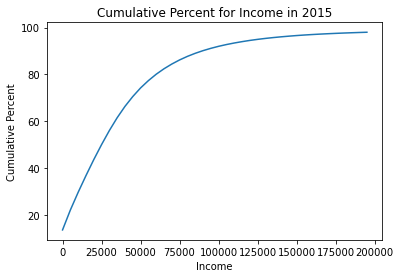

Enter a choice to get (r)ange, (p)ercent, or nothing to stop: 


In [26]:
# 3rd test case
if __name__ == "__main__":
    main()